In [29]:
%load_ext autoreload
%autoreload 2
# testing habitat lab setup
import sys
import math
import io
from typing import Dict, Any
import numpy as np
import quaternion
from scipy.spatial.transform import Rotation
from habitat.core.utils import try_cv2_import
from habitat.utils.visualizations import maps
from torchlightning_utils import cli
from habitat_simulation.agents import ShortestPathFollowerAgent
from habitat_simulation.collector import DatasetCollector
from habitat_simulation.envs import SimpleRLEnv
import matplotlib.pyplot as plt
from PIL import Image

def display_sample(rgb_obs, semantic_obs=np.array([]), depth_obs=np.array([])):
    from habitat_sim.utils.common import d3_40_colors_rgb

    arr = []
    titles = []
    if semantic_obs.size != 0:
        semantic_img = Image.new("P", (semantic_obs.shape[1], semantic_obs.shape[0]))
        semantic_img.putpalette(d3_40_colors_rgb.flatten())
        semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
        semantic_img = semantic_img.convert("RGBA")
        arr.append(semantic_img)
        titles.append("semantic")

    plt.figure(figsize=(12, 8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 1, i + 1)
        ax.axis("off")
        ax.set_title(titles[i])
        plt.imshow(data)
    plt.show(block=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
%load_ext autoreload
%autoreload 2
import habitat
config_path = "/home/azureuser/AutonomousSystemsResearch/habitat-simulation/configs/collect.yaml"
with open(config_path, mode="r") as f:
    from omegaconf import OmegaConf
    config = OmegaConf.create(f.read())
    config = OmegaConf.to_container(config, resolve=True)

offline_dataset_config, online_env_config = config["offline_dataset"], config["online_env"]


env_config = habitat.get_config(config_paths=online_env_config["env_config_path"])    

with habitat.config.read_write(env_config):
    env_config.habitat.dataset.split = online_env_config["env_split"]
    env_config.habitat.dataset.data_path = online_env_config["env_data_path"]
    env_config.habitat.dataset.scenes_dir = online_env_config["env_scene_dir"]
    env_config.habitat.simulator.scene_dataset = online_env_config[
        "env_scene_dataset_config"
    ]
from habitat.sims import make_sim
env = habitat.Env(config=env_config)
env.current_episode.scene_dataset_config = online_env_config[
        "env_scene_dataset_config"
    ]

env._config.defrost()
env._config.simulator.scene_dataset = (
                env.current_episode.scene_dataset_config
            )
env._config.freeze()
env._sim = make_sim(
           id_sim=env._config.simulator.type, config=env._config.simulator)

2022-11-26 02:41:24,445 Initializing dataset ObjectNav-v1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2022-11-26 02:41:25,061 initializing sim Sim-v0
2022-11-26 02:41:37,032 Initializing task ObjectNav-v1
2022-11-26 02:41:37,034 initializing sim Sim-v0


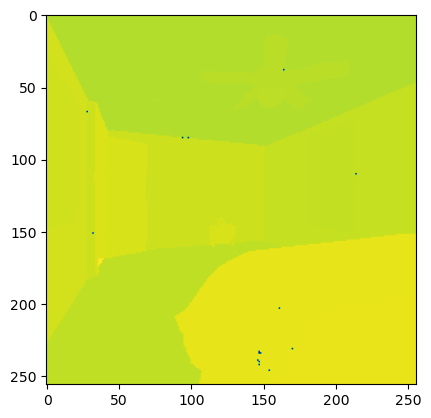

In [31]:
total_frames = 0
max_frames = 5
observations = env.reset() #adding reset does not hurt semantics
plt.imshow(observations["semantic"][:,:,0])
# while total_frames < max_frames:
#     action =  2
#     observations = env._sim.step(action)
# # 
#     break
#     total_frames += 1

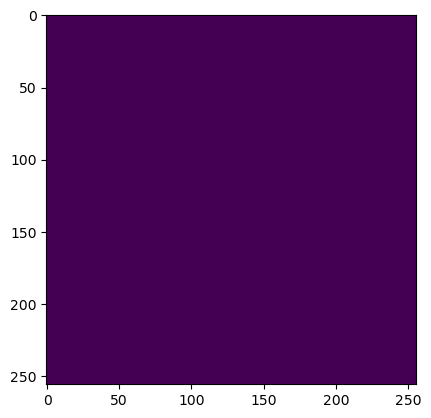

In [20]:
for episode in range(20):
    while not env.episode_over:
        action = "move_forward"
        next_observations = env.step(action)
        plt.imshow(next_observations["semantic"][:,:,0])
        break
env.close()